In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
from tqdm import tqdm_notebook as tqdm
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('../data/car_ads_3.csv', index_col=0)

In [3]:
df.head(5)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
2282567,ford,fiesta,129000.0,2009.0,NaN,88.0,other,NaN,NaN,man,NaN,NaN,NaN,2016-03-01 04:22:44.466271+00,2016-07-03 17:16:27.50003+00,6900.00
845119,seat,leon,NaN,2004.0,4245.0,NaN,compact,NaN,None,NaN,None,None,gasoline,2015-12-22 06:54:54.986737+00,2016-01-07 10:08:16.993797+00,3886.01
645106,smart,fortwo,99985.0,2004.0,698.0,37.0,NaN,NaN,None,auto,2,2,gasoline,2015-12-12 17:23:52.693186+00,2016-02-10 20:13:12.406986+00,2000.22
2468530,ford,focus,212020.0,2002.0,1753.0,66.0,other,NaN,NaN,man,5,5,NaN,2016-03-04 22:05:51.891484+00,2016-07-03 17:34:54.394008+00,1600.00
3478350,volkswagen,golf,180000.0,2003.0,1900.0,74.0,other,NaN,NaN,man,NaN,NaN,NaN,2017-02-28 18:34:33.090724+00,2017-03-06 01:07:20.215485+00,1295.34


## Pandas-profiling


In [4]:
!pip show pandas_profiling

Name: pandas-profiling
Version: 2.5.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/pandas-profiling/pandas-profiling
Author: Simon Brugman
Author-email: pandasprofiling@gmail.com
License: MIT
Location: /Users/okudashimpeisimac/.pyenv/versions/anaconda3-5.2.0/envs/kaggle/lib/python3.7/site-packages
Requires: matplotlib, ipywidgets, requests, phik, visions, tqdm, confuse, kaggle, missingno, astropy, tangled-up-in-unicode, scipy, jinja2, numpy, htmlmin, pandas
Required-by: 


In [5]:
# warningsを無視
import warnings
warnings.filterwarnings('ignore')

profile = pdp.ProfileReport(df)

In [8]:
profile.to_file(output_file="./profiling.html")

## 基本データ情報の確認

In [4]:
print('---データ数(shape)---')
print(df.shape)
print('\n')

print('---有効データ数(count)---')
print(df.count())
print('\n')

print('---データ型(dtypes)---')
print(df.dtypes)
print('\n')

print('---データ情報(info)---')
print(df.info())

---データ数(shape)---
(888228, 16)


---有効データ数(count)---
maker                  758767
model                  604963
mileage                797759
manufacture_year       795878
engine_displacement    702433
engine_power           749571
body_type              608008
color_slug              52624
stk_year               460425
transmission           702799
door_count             734344
seat_count             700943
fuel_type              426005
date_created           888228
date_last_seen         888228
price_eur              888228
dtype: int64


---データ型(dtypes)---
maker                   object
model                   object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
body_type               object
color_slug              object
stk_year                object
transmission            object
door_count              object
seat_count              object
fuel_type               object
date_created            object

## 欠損値の確認

In [5]:
df.isnull().sum()

maker                  129461
model                  283265
mileage                 90469
manufacture_year        92350
engine_displacement    185795
engine_power           138657
body_type              280220
color_slug             835604
stk_year               427803
transmission           185429
door_count             153884
seat_count             187285
fuel_type              462223
date_created                0
date_last_seen              0
price_eur                   0
dtype: int64

## 要約量の確認

In [6]:
df.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,7.977590e+05,795878.000000,702433.000000,749571.000000,8.882280e+05
mean,1.159063e+05,2000.808873,2042.765531,98.448538,3.062208e+06
std,3.446937e+05,82.399243,1961.148841,49.012609,2.871372e+09
min,0.000000e+00,0.000000,0.000000,1.000000,4.000000e-02
25%,1.874200e+04,2004.000000,1400.000000,68.000000,1.295340e+03
50%,8.637600e+04,2009.000000,1798.000000,86.000000,7.327910e+03
75%,1.584085e+05,2013.000000,1997.000000,110.000000,1.628179e+04
max,9.999999e+06,2017.000000,32000.000000,999.000000,2.706149e+12


### 10分位で分けて統計量

In [7]:
df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,7.977590e+05,795878.000000,702433.000000,749571.000000,8.882280e+05
mean,1.159063e+05,2000.808873,2042.765531,98.448538,3.062208e+06
std,3.446937e+05,82.399243,1961.148841,49.012609,2.871372e+09
min,0.000000e+00,0.000000,0.000000,1.000000,4.000000e-02
10%,1.000000e+01,1999.000000,1198.000000,52.000000,1.295340e+03
20%,1.000000e+04,2003.000000,1390.000000,66.000000,1.295340e+03
30%,2.697140e+04,2005.000000,1560.000000,74.000000,2.183570e+03
40%,5.698920e+04,2007.000000,1598.000000,80.000000,4.437450e+03
50%,8.637600e+04,2009.000000,1798.000000,86.000000,7.327910e+03
60%,1.141184e+05,2011.000000,1968.000000,100.000000,1.054678e+04


## 可視化

In [25]:
# fontsizeの設定
plt.rcParams["font.size"] = 30

# サイズの設定
plt.rcParams['figure.figsize'] = (8, 6)

### object type

In [19]:
# object型のカラムを抜き出し
object_categories = df.select_dtypes(include=['object']).columns
print(object_categories)

Index(['maker', 'model', 'body_type', 'color_slug', 'stk_year', 'transmission',
       'door_count', 'seat_count', 'fuel_type', 'date_created',
       'date_last_seen'],
      dtype='object')


In [54]:
# # countplot
for i, category in enumerate(object_categories):
    unique = df[category].unique()
    g = df.groupby(by=category)[category].count().sort_values(ascending=False)
#     print(g.head(len(unique)))
    print(category)
    print('---unique number---')
    print(str(len(unique)))
    print('\n')
#     sns.countplot(x=category, data=df, order=df[category].value_counts().iloc[:10].index)
#     sns.countplot(x=category, data=df)
    # plt.bar(r, g.head()) 
    # plt.xticks(r, v)
#     plt.xticks(r, g.index)
#     plt.show()

maker
---unique number---
47


model
---unique number---
955


body_type
---unique number---
10


color_slug
---unique number---
15


stk_year
---unique number---
114


transmission
---unique number---
3


door_count
---unique number---
15


seat_count
---unique number---
43


fuel_type
---unique number---
6


date_created
---unique number---
888228


date_last_seen
---unique number---
839005




#### maker

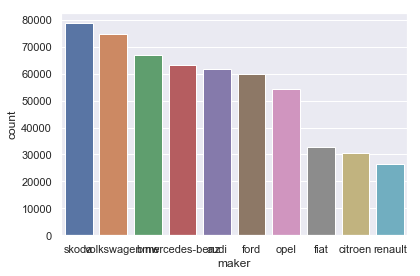

In [45]:
sns.countplot(x='maker', data=df, order=df['maker'].value_counts().iloc[:10].index)
print('maker')
print('---unique number---')
print(str(len(unique)))
plt.tight_layout()
plt.show()

#### seat_count

#### transmission

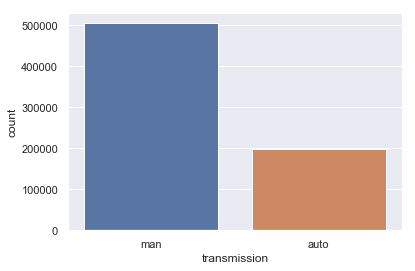

In [46]:
sns.countplot(x='transmission', data=df)
plt.show()

### float type

In [12]:
int_categories = df.select_dtypes(include=['float64']).columns

In [13]:
int_categories

Index(['mileage', 'manufacture_year', 'engine_displacement', 'engine_power',
       'price_eur'],
      dtype='object')

In [ ]:
def outlier_df(df):

    for i in range(len(df.columns)):

        # 列を抽出する
        col = df.iloc[:,i]

        # 四分位数
        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 #四分位範囲

        # 外れ値の基準点
        outlier_min = q1 - (iqr) * 1.5
        outlier_max = q3 + (iqr) * 1.5

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return df


def outlier_se(series):
    # 四分位数
    q1 = series.describe()['25%']
    q3 = series.describe()['75%']
    iqr = q3 - q1 #四分位範囲

    # 外れ値の基準点
    outlier_min = q1 - (iqr) * 1.5
    outlier_max = q3 + (iqr) * 1.5

    # 範囲から外れている値を除く
    series[series < outlier_min] = None
    series[series > outlier_max] = None

    return series

#### mileage

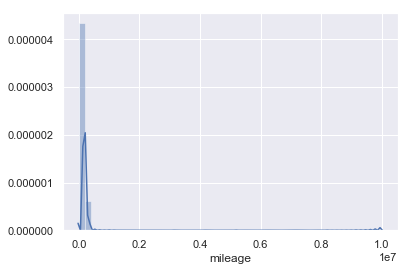

In [47]:
sns.distplot(df['mileage'].dropna())

#### manufacuture_year

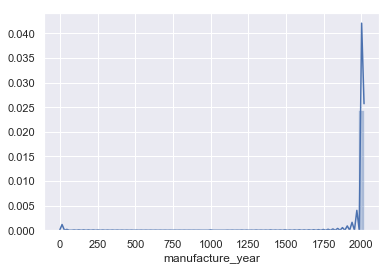

In [48]:
sns.distplot(df['manufacture_year'].dropna())
plt.show()

#### engine_displacement

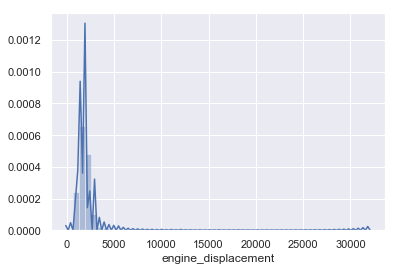

In [49]:
sns.distplot(df['engine_displacement'].dropna())
plt.show()

#### engine_power

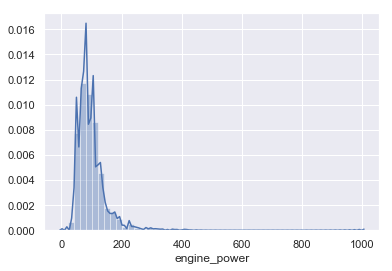

In [50]:
sns.distplot(df['engine_power'].dropna())
plt.show()

#### price_eur

In [ ]:
sns.distplot(df['price_eur'])
df['price_eur'].max()

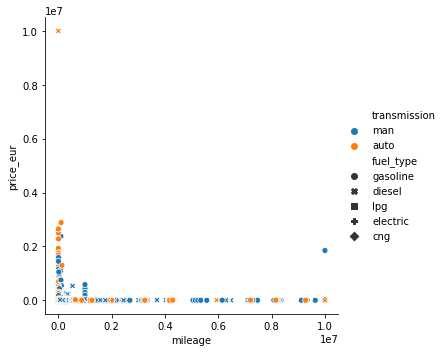

In [43]:
sns.relplot(x="mileage", y="price_eur", 
            hue="transmission", style="fuel_type",
            data=df)

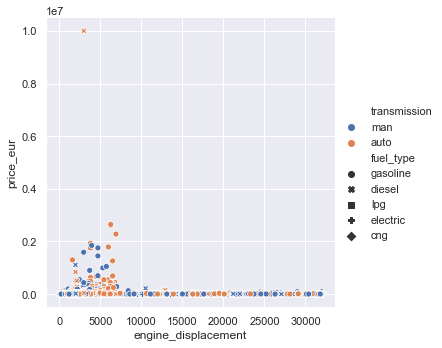

In [52]:
sns.relplot(x="engine_displacement", y="price_eur", 
            hue="transmission", style="fuel_type",
            data=df)

/Users/okudashimpei/.pyenv/versions/anaconda3-5.2.0/envs/python365/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/okudashimpei/.pyenv/versions/anaconda3-5.2.0/envs/python365/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


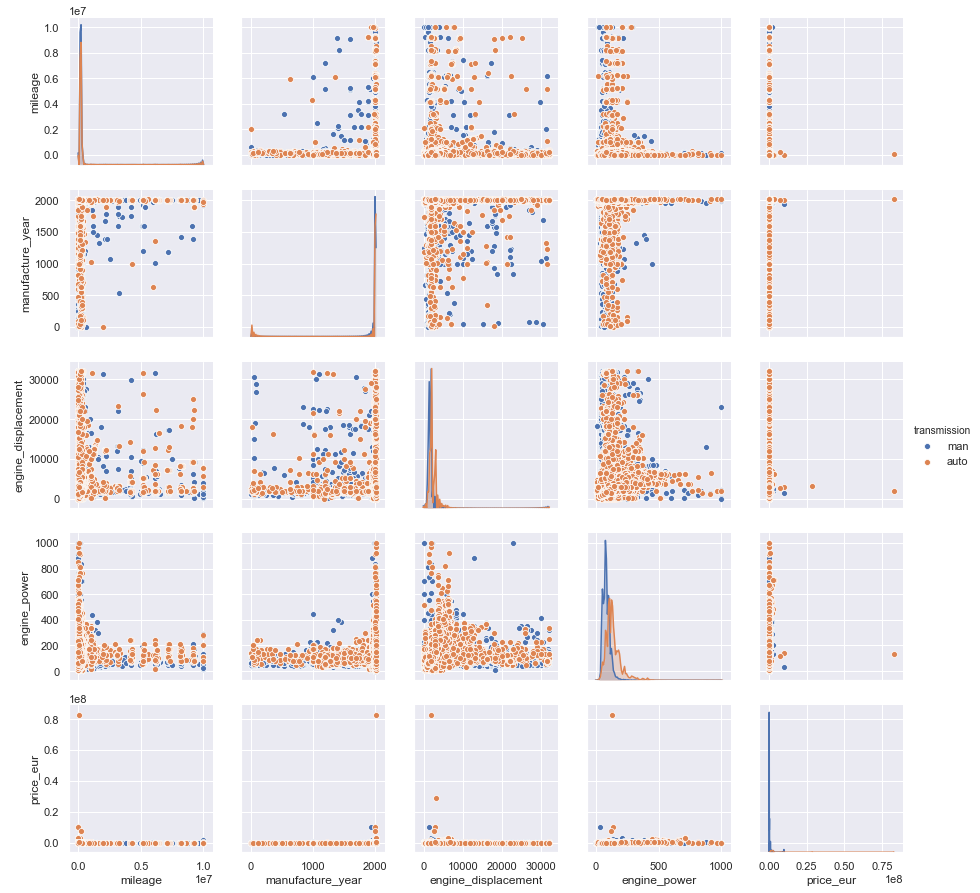

In [67]:
sns.pairplot(df, hue='transmission')
plt.show()

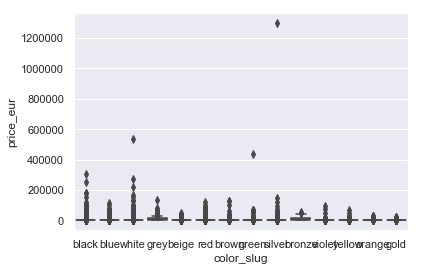

In [65]:
sns.boxplot(x='color_slug', y='price_eur', data=df)